<a href="https://colab.research.google.com/github/tomaszmm3/data-science/blob/main/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
pd.__version__

'2.2.2'

In [ ]:
s = pd.Series([1, 2, 3, 4, 5])
s

,0
0,1
1,2
2,3
3,4
4,5


In [ ]:
s = pd.Series(data=[2, np.nan, 6, 8], index=['a', 'b', 'c', 'd'], name='sample')
s

,sample
a,2.0
b,NaN
c,6.0
d,8.0


In [ ]:
s = pd.Series(data=np.arange(10, 20), index=pd.date_range('20200101', periods=10))
s

,0
2020-01-01,10
2020-01-02,11
2020-01-03,12
2020-01-04,13
2020-01-05,14
2020-01-06,15
2020-01-07,16
2020-01-08,17
2020-01-09,18
2020-01-10,19


In [ ]:
s.index
s.values

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [ ]:
price = pd.Series(data={"Apple": 100, "CD": 20, "Amazon": 200, "KGHM": np.nan})
price
price["Amazon"]
price[2]
price.count()
price.value_counts()
price.sum()
price.max()
price.describe()
price.value_counts(dropna=False)
price.nlargest(2)
price.rank()
price.sort_values()

<ipython-input-35-6cebdee9249f>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price[2]


,0
CD,20.0
Apple,100.0
Amazon,200.0
KGHM,NaN


In [ ]:
pricePLN = price.apply(lambda x: x*3.8)
pricePLN

,0
Apple,380.0
CD,76.0
Amazon,760.0
KGHM,NaN


In [ ]:
df = pd.DataFrame(data=[1, 2, 3, 4], index=['a', 'b', 'c', 'd'], columns=["kol1"])
df = pd.DataFrame(data={'WIG20': ['PKO', 'BP'], 'WIG40': ['PEKAO', 'SA']})
df.columns
df.values
df.info()
df.describe()
df['WIG40'] #series
df[['WIG40']] #df
df.WIG40
df.loc(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   WIG20   2 non-null      object
 1   WIG40   2 non-null      object
dtypes: object(2)
memory usage: 164.0+ bytes


In [ ]:
df = pd.DataFrame(data=[[12, 23, 34], [98, 76, 54]], columns=['col1', 'col2', 'col3'], index=['row1', 'row2'])
df.loc['row1']
df.iloc[1]
df.loc["row1", "col2"]
df.iloc[1, 2]

np.int64(54)

In [33]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetches stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')
data = fetch_financial_data()


In [ ]:
#data.info()
data.tail()
data.columns = [col.lower() for col in data.columns]
data.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [ ]:
data.describe()

,open,high,low,close,volume
count,1256.000000,1256.000000,1256.000000,1256.000000,1.256000e+03
mean,155.348868,157.254230,153.292178,155.309764,6.347134e+07
std,33.488412,33.604451,33.279693,33.469299,2.990643e+07
min,82.800000,83.480000,81.430000,81.820000,1.500750e+07
25%,131.007500,132.720000,129.325000,130.791000,4.305516e+07
50%,159.275500,161.134500,157.225500,159.259000,5.657409e+07
75%,176.536750,178.417500,174.307500,176.185500,7.521672e+07
max,239.015000,242.520000,238.030000,242.060000,2.726617e+08


In [ ]:
data[['open', 'close']]


,open,close
Date,,
2025-06-05,209.550,207.910
2025-06-04,206.550,207.230
2025-06-03,207.105,205.710
2025-06-02,204.980,206.650
2025-05-30,204.840,205.010
...,...,...
2020-06-12,130.060,127.251
2020-06-11,130.175,127.898
2020-06-10,132.250,132.372


In [ ]:
df = fetch_financial_data("UBER")
df.describe()



,Open,High,Low,Close,Volume
count,1256.000000,1256.000000,1256.000000,1256.000000,1.256000e+03
mean,48.931424,49.804062,48.041188,48.932110,2.388227e+07
std,17.519656,17.695832,17.301747,17.510091,1.631540e+07
min,20.370000,21.125500,19.895000,20.460000,5.200356e+06
25%,33.445000,34.000000,32.647500,33.390000,1.560138e+07
50%,45.620000,46.639950,45.008650,45.770000,2.021322e+07
75%,64.527500,65.391250,63.630000,64.552500,2.784068e+07
max,93.350000,93.600000,90.610000,92.460000,3.642612e+08


In [ ]:
df["Average"] = (df.Open + df.Close) / 2
df


,Open,High,Low,Close,Volume,Average
Date,,,,,,
2025-06-05,83.620,85.750,83.0800,84.67,33343311,84.1450
2025-06-04,83.200,84.710,82.9900,83.45,20080520,83.3250
2025-06-03,83.575,83.790,81.8600,82.53,25668362,83.0525
2025-06-02,84.480,84.760,82.6400,83.64,17047042,84.0600
2025-05-30,84.530,84.650,82.5400,84.16,29050884,84.3450
...,...,...,...,...,...,...
2020-06-12,32.730,32.740,31.0400,32.24,27685169,32.4850
2020-06-11,32.630,33.245,30.8904,31.10,45298714,31.8650
2020-06-10,36.690,36.800,34.2650,34.83,43473719,35.7600


In [ ]:
df = df.sort_index()

In [ ]:
df['Close_shift'] = df.Close.shift(1)
df['Daily_change'] = df.Close / df.Close_shift

del df['Close_shift']
df


,Open,High,Low,Close,Volume,Average,Daily_change
Date,,,,,,,
2020-06-08,37.870,37.900,36.0900,37.08,30099525,37.4750,NaN
2020-06-09,36.700,37.330,36.2500,36.59,15127269,36.6450,0.986785
2020-06-10,36.690,36.800,34.2650,34.83,43473719,35.7600,0.951899
2020-06-11,32.630,33.245,30.8904,31.10,45298714,31.8650,0.892908
2020-06-12,32.730,32.740,31.0400,32.24,27685169,32.4850,1.036656
...,...,...,...,...,...,...,...
2025-05-30,84.530,84.650,82.5400,84.16,29050884,84.3450,0.998339
2025-06-02,84.480,84.760,82.6400,83.64,17047042,84.0600,0.993821
2025-06-03,83.575,83.790,81.8600,82.53,25668362,83.0525,0.986729


<Axes: xlabel='Date'>

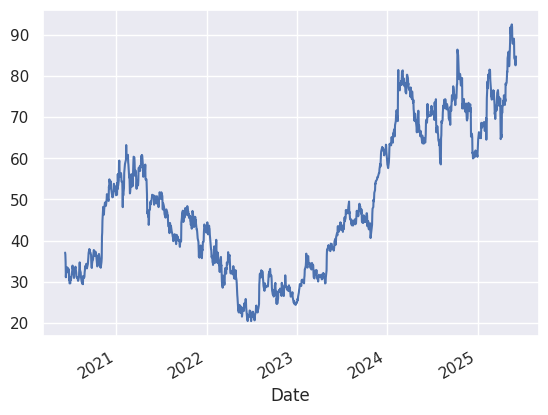

In [ ]:
import seaborn as sns
sns.set()
#df.Daily_change.hist(bins=100)
df.Close.plot()



In [ ]:
df[df.Daily_change > 1]


,Open,High,Low,Close,Volume,Average,Daily_change
Date,,,,,,,
2020-06-12,32.7300,32.740,31.0400,32.24,27685169,32.48500,1.036656
2020-06-15,31.1600,32.680,31.0201,32.67,21350290,31.91500,1.013337
2020-06-16,34.0000,34.170,32.4300,33.49,21377119,33.74500,1.025099
2020-06-18,33.0000,33.440,32.8000,33.40,15495838,33.20000,1.003304
2020-06-22,32.4300,32.850,31.4300,32.68,17790276,32.55500,1.011765
...,...,...,...,...,...,...,...
2025-05-16,90.3150,92.900,89.7100,91.79,21909595,91.05250,1.018079
2025-05-19,90.8800,92.545,90.5600,92.46,19252125,91.67000,1.007299
2025-05-27,89.1699,89.715,87.8900,89.00,17446940,89.08495,1.014245


In [ ]:
df[(df.index < "2024-01-01") & (df.index >= '2023-01-01')]
df[df.index.month == 1]
df[df.index.year == 2023]


,Open,High,Low,Close,Volume,Average,Daily_change
Date,,,,,,,
2023-01-03,25.37,25.750,25.0200,25.36,22155275,25.365,1.025475
2023-01-04,25.73,25.970,25.3200,25.91,14815960,25.820,1.021688
2023-01-05,25.73,26.010,25.5500,25.55,9942038,25.640,0.986106
2023-01-06,25.86,26.540,25.4000,26.40,19443753,26.130,1.033268
2023-01-09,27.30,28.050,27.1500,27.40,24962057,27.350,1.037879
...,...,...,...,...,...,...,...
2023-12-22,61.70,62.235,61.2800,61.71,14715609,61.705,1.004068
2023-12-26,61.71,62.200,61.3136,61.98,16077192,61.845,1.004375
2023-12-27,62.00,63.430,62.0000,63.28,20805951,62.640,1.020975


In [7]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web

df = web.DataReader(name='META', data_source='stooq')


In [10]:
df.to_csv('meta.csv')


In [23]:
df_nov = df[(df.index.month == 11) & (df.index.year == 2020)]
df_nov.to_csv('meta_nov.csv')
df_nov.to_excel('meta_now.xlsx')

In [27]:
df_read = pd.read_excel('meta_now.xlsx', index_col=0)
df_read

,Open,High,Low,Close,Volume
Date,,,,,
2020-11-30,276.0300,277.7000,271.01,276.97,16693336
2020-11-27,277.3900,279.1300,274.82,277.81,7808426
2020-11-25,278.1400,280.1800,272.65,275.59,12467009
2020-11-24,268.4900,277.8199,267.87,276.92,16930424
2020-11-23,270.8900,270.9471,264.53,268.43,20990786
2020-11-20,272.5600,273.0000,269.41,269.70,18122412
2020-11-19,271.0250,273.4700,269.19,272.94,12963658
2020-11-18,274.5200,277.3889,271.84,271.97,12152945
2020-11-17,277.6800,277.6800,273.29,275.00,15040297


In [31]:
df = pd.read_csv('london_bike.csv')
df.set_index('timestamp', inplace=True)
df.head()


,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [35]:
apple = fetch_financial_data(company='AAPL')
amazon = fetch_financial_data(company='AMZN')
google = fetch_financial_data(company='GOOGL')
uber = fetch_financial_data(company='UBER')

In [38]:
apple.columns = ['apple_' + col.lower() for col in apple.columns]
amazon.columns = ['amazon_' + col.lower() for col in amazon.columns]
google.columns = ['google_' + col.lower() for col in google.columns]
uber.columns = ['uber_' + col.lower() for col in uber.columns]


In [40]:
df = pd.concat(objs=[apple, amazon, google, uber], axis=1)

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
apple_apple_open,1255.0,1.647644e+02,3.789992e+01,8.109080e+01,1.375765e+02,1.623900e+02,1.886990e+02,2.579060e+02
apple_apple_high,1255.0,1.666149e+02,3.817181e+01,8.411740e+01,1.398290e+02,1.641460e+02,1.901095e+02,2.598140e+02
apple_apple_low,1255.0,1.630426e+02,3.770532e+01,8.092730e+01,1.356740e+02,1.609620e+02,1.874285e+02,2.573470e+02
apple_apple_close,1255.0,1.649209e+02,3.799337e+01,8.173750e+01,1.376090e+02,1.627460e+02,1.888260e+02,2.587360e+02
apple_apple_volume,1255.0,8.177756e+07,4.303141e+07,2.326025e+07,5.255167e+07,7.110416e+07,9.676205e+07,3.845460e+08
amazon_amazon_open,1255.0,1.554415e+02,3.351949e+01,8.280000e+01,1.311800e+02,1.593400e+02,1.766345e+02,2.390150e+02
amazon_amazon_high,1255.0,1.573445e+02,3.363654e+01,8.348000e+01,1.329910e+02,1.612000e+02,1.786150e+02,2.425200e+02
amazon_amazon_low,1255.0,1.533824e+02,3.331325e+01,8.143000e+01,1.294700e+02,1.572540e+02,1.743320e+02,2.380300e+02
amazon_amazon_close,1255.0,1.553995e+02,3.350524e+01,8.182000e+01,1.313700e+02,1.592800e+02,1.762540e+02,2.420600e+02
amazon_amazon_volume,1255.0,6.340789e+07,2.990097e+07,1.500750e+07,4.296977e+07,5.643828e+07,7.515939e+07,2.726617e+08


In [43]:
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
apple_apple_open,1255.00,164.76,37.90,81.09,137.58,162.39,188.70,257.91
apple_apple_high,1255.00,166.61,38.17,84.12,139.83,164.15,190.11,259.81
apple_apple_low,1255.00,163.04,37.71,80.93,135.67,160.96,187.43,257.35
apple_apple_close,1255.00,164.92,37.99,81.74,137.61,162.75,188.83,258.74
apple_apple_volume,1255.00,81777557.59,43031414.72,23260251.00,52551667.50,71104164.00,96762054.50,384545982.00
amazon_amazon_open,1255.00,155.44,33.52,82.80,131.18,159.34,176.63,239.01
amazon_amazon_high,1255.00,157.34,33.64,83.48,132.99,161.20,178.62,242.52
amazon_amazon_low,1255.00,153.38,33.31,81.43,129.47,157.25,174.33,238.03
amazon_amazon_close,1255.00,155.40,33.51,81.82,131.37,159.28,176.25,242.06
amazon_amazon_volume,1255.00,63407892.65,29900966.15,15007497.00,42969766.50,56438280.00,75159393.50,272661720.00


In [45]:
closes = [col for col in df.columns if col.endswith('close')]
df[closes].corr()

,apple_apple_close,amazon_amazon_close,google_google_close,uber_uber_close
apple_apple_close,1.00,0.52,0.88,0.66
amazon_amazon_close,0.52,1.00,0.71,0.77
google_google_close,0.88,0.71,1.00,0.72
uber_uber_close,0.66,0.77,0.72,1.00


In [46]:
url = 'https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/appstore_games.csv'
df_raw = pd.read_csv(url)
df_raw.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.00,3553.00,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.00,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.50,284.00,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.00,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.00,8376.00,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.00,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.50,190394.00,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.00,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.50,28.00,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.00,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [47]:
df_raw.describe()

,ID,Average User Rating,User Rating Count,Price,Size
count,17007.00,7561.00,7561.00,16983.00,17006.00
mean,1059613815.45,4.06,3306.53,0.81,115706429.89
std,299967589.36,0.75,42322.56,7.84,203647677.85
min,284921427.00,1.00,5.00,0.00,51328.00
25%,899654330.00,3.50,12.00,0.00,22950144.00
50%,1112286228.00,4.50,46.00,0.00,56768954.00
75%,1286982837.00,4.50,309.00,0.00,133027072.00
max,1475076711.00,5.00,3032734.00,179.99,4005591040.00


In [61]:
df = df_raw.copy()

In [62]:
df = df.drop(columns=['URL', 'Icon URL', 'Subtitle', 'Description', 'In-app Purchases'])


In [63]:
df = df.set_index('ID')

In [65]:
df.describe(include=['object']).T


,count,unique,top,freq
Name,17007,16847,10-in-1 Board Games BA.net,2
Developer,17007,8693,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,123
Age Rating,17007,4,4+,11806
Languages,16947,990,EN,12467
Primary Genre,17007,21,Games,16286
Genres,17007,1004,"Games, Strategy, Puzzle",778
Original Release Date,17007,3084,2/09/2016,75
Current Version Release Date,17007,2512,1/08/2019,118


In [66]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

In [67]:
df.columns

Index(['name', 'average_user_rating', 'user_rating_count', 'price',
       'developer', 'age_rating', 'languages', 'size', 'primary_genre',
       'genres', 'original_release_date', 'current_version_release_date'],
      dtype='object')

In [69]:
df.primary_genre.value_counts().nlargest(5)

,count
primary_genre,
Games,16286
Education,222
Entertainment,198
Utilities,77
Sports,60


<Axes: ylabel='count'>

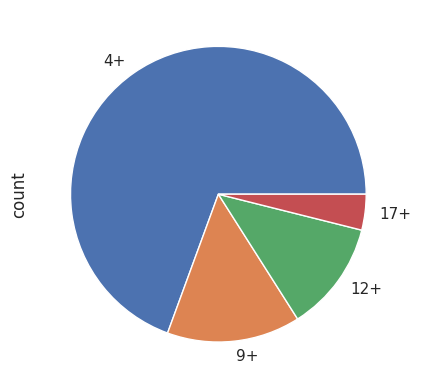

In [76]:
import seaborn as sns
sns.set()
#df.primary_genre.value_counts().nlargest(5).plot(kind='bar')
df.age_rating.value_counts().plot(kind='pie')

<Axes: xlabel='average_user_rating'>

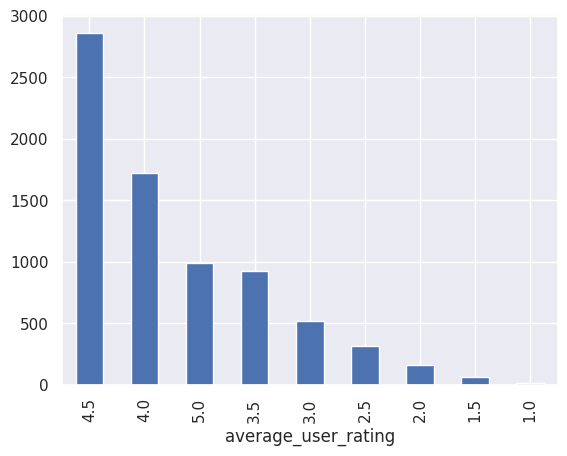

In [78]:
df.average_user_rating.value_counts().plot(kind='bar')

In [85]:
df['nun"lanm'] = df.languages.str.split(', ').str.len()

In [90]:
df.average_user_rating.value_counts(dropna=False)



,count
average_user_rating,
NaN,9446
4.50,2861
4.00,1722
5.00,990
3.50,925
3.00,514
2.50,317
2.00,158
1.50,60


In [97]:
#df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17007 entries, 284921427 to 1475076711
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          17007 non-null  object 
 1   average_user_rating           7561 non-null   float64
 2   user_rating_count             7561 non-null   float64
 3   price                         16983 non-null  float64
 4   developer                     17007 non-null  object 
 5   age_rating                    17007 non-null  object 
 6   languages                     16947 non-null  object 
 7   size                          17006 non-null  float64
 8   primary_genre                 17007 non-null  object 
 9   genres                        17007 non-null  object 
 10  original_release_date         17007 non-null  object 
 11  current_version_release_date  17007 non-null  object 
 12  nun"lanm                      16947 non-null  float6

In [98]:
df = df.dropna()


In [100]:
df.isnull().sum()
#df.info()

,0
name,0
average_user_rating,0
user_rating_count,0
price,0
developer,0
age_rating,0
languages,0
size,0
primary_genre,0
genres,0
